<a href="https://colab.research.google.com/github/animesh7780/Python/blob/main/Handwritten_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [4]:
x, y = mnist['data'], mnist['target']

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
%matplotlib inline

In [10]:
import matplotlib
import matplotlib.pyplot as plt

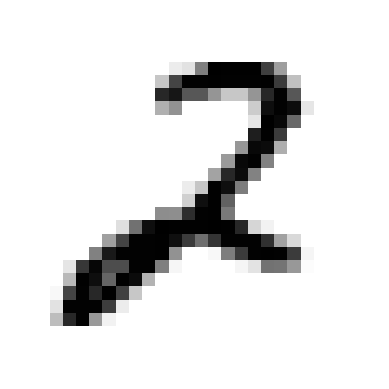

In [14]:
some_digit = x.iloc[36001]
some_digit_image = some_digit.values.reshape(28, 28) #reshape to plot
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [16]:
y[36001]

'2'

In [18]:
x_train, X_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]

In [20]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train[shuffle_index]

Creating a '2' detector

In [31]:
y_test = y_test.astype(np.int8)
y_train = y_train.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [24]:
y_train_2
y_test_2

,class
60000,False
60001,False
60002,False
60003,False
60004,False
...,...
69995,False
69996,False
69997,False
69998,False


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
clf = LogisticRegression()

In [32]:
clf.fit(x_train, y_train_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(clf, x_train, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.9188 , 0.91595, 0.9142 ])

In [36]:
y_train_not_2 = (y_train!=2)
y_test_not_2 = (y_test!=2)

In [37]:
clf.fit(x_train, y_train_not_2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
clf.predict([some_digit])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [39]:
cross_val_score(clf, x_train, y_train, cv=3, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.9188 , 0.91595, 0.9142 ])